In [ ]:
# !pip install gdal
# !pip install mpld3

In [ ]:
from sklearn.cluster import KMeans
from osgeo import gdal #Geospatial data abstraction library
import matplotlib.pyplot as plt #Used for plotting data
import numpy as np
import mpld3 #For making zoomable pyplots

In [ ]:
dem_path = "/content/drive/My Drive/Image Segmentation/"
lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
hill_shade_path = dem_path + 'Hillshade.tif'

ds = gdal.Open(hill_shade_path, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray().astype(np.uint8)
img_array.shape

(632, 358)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_array)
# kmeans.labels_

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
labels = kmeans.labels_.flatten()

In [ ]:
segmented_image = centers[labels]

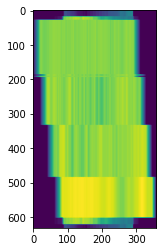

In [ ]:
plt.imshow(segmented_image)
plt.show()

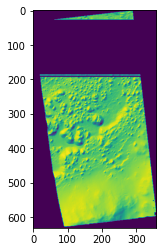

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(img_array)
# color (i.e cluster) to disable
cluster = 1

disable_values = np.zeros(img_array.shape[1])
masked_image[labels == cluster] = disable_values

# show the image
plt.imshow(masked_image)
plt.show()